
The objectives of this section are to:

1. Introduce a plotting package for Python+NumPy -- `Matplotlib`.
2. Creating figures with multiple plots -- sub-plots.
3. Concluding exercises -- applying what you have learned!

# Plotting functionality for Python -- Matplotlib


Matplotlib is the most popular plotting library for Python and can be used to create a vast array of very high quality plots. See the Matplotlib development website's [gallery](http://matplotlib.org/gallery.html) for many examples. This flexibility incurs complexity which is far beyond the scope of an introductory course. We will learn about three modules that Matplotlib provides:

* `pyplot` -- this module contains a user interface, similar to that of MATLAB(TM), for 2D plotting.
* `pylab` -- this module is provided for convenience when using Matplotlib interactive and contains both `numpy` and `pyplot` namespaces. Not recommended for use.
* `mplot3` -- this module contains a user interface for 3D plotting.

The typical work-flow using these modules is,

1. Generate data to plot, post-process if necessary.
2. "Describe" the desired plot through a series of function calls (`plot()`, `histogram()`, etc).
3. If not in interactive mode, render the plot to screen using `show()`.
4. Make minor corrections, if needed, and export graphics file to disk.

Before we go through a simple example of this workflow, let's take a brief aside to discuss different types of graphics file formats. A basic understanding of this is vital for the generation of high-quality images. There are two general types of graphics file formats:

* *bitmap* -- this type of format is most common and stores images as two-dimensional arrays of pixels. Specific implementations include the JPG and PNG formats.
* *vector* -- this type of format is less common and stores images as either sets of vectors describing objects (curves, surfaces, etc) and/or bitmaps. Specific implementations include the SVG and PDF formats.

Your display is (likely) composed of a two-dimensional array of pixels which is the motivation for bitmap-type formats, but there is a significant problem with such formats when resizing/rescaling images. Bitmap images are excellent at approximating continuous images well, but are not adequate for discrete objects. When you rescale a bitmap image containing text, image looks blurry.

As you zoom into the image, the discrete objects (letters in this case), become grainy. Vector-type formats address this by explicitly storing text, curves, and other discrete objects. The drawback is that these vector formats must be rendered into a bitmap to be displayed to screen, but rendering at different scales does not result in coarsening of the image.

Keep this knowledge in-mind when exporting graphics files!

Let's now try and representative example using Matplotlib -- plotting a 1D function,

In [1]:
# this is required for *interactive* use with iPython or the iPython Notebook,
# otherwise it is not needed
#%pylab --no-import-all

# these imports are needed to both generate data to plot and use Matplotlib's
# user interface

from numpy import *
from matplotlib.pyplot import *

%matplotlib inline

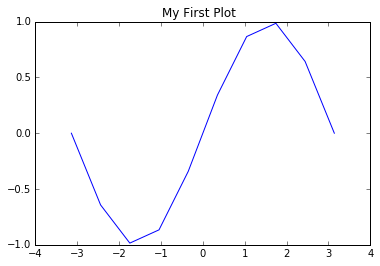

In [3]:

# let's plot sin(x) and cos(x) over one period
x = linspace(-pi, pi, 10)
f1 = sin(x)
title('My First Plot  ')

plot(x, f1)
show()

After executing the code above a plot will appear, but the number of points we have evaluated results in a coarse plot. Let's remedy this,

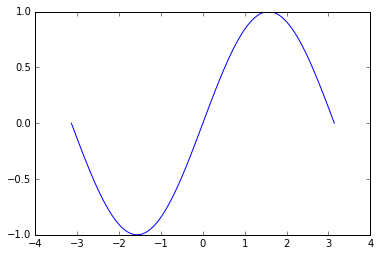

In [4]:
x = linspace(-pi, pi, 100)
f1 = sin(x)

plot(x, f1)

This plot looks much better, but it is missing some key features such as a title, axis labels, and a legend,

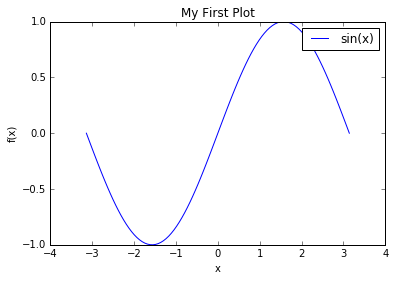

In [6]:
# we need to add a label string for legend() to work
plot(x, f1, label="sin(x)")

xlabel('x')
ylabel('f(x)')
title('My First Plot')
legend()
show()

We are not restricted to plotting only one function,

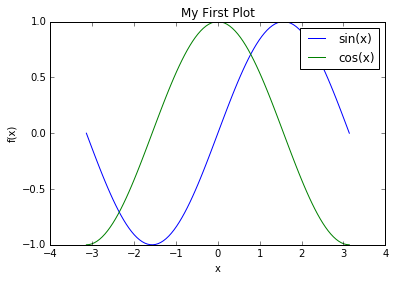

In [7]:
f2 = cos(x)

plot(x, f1)
plot(x, f2)
# ...

xlabel('x')
ylabel('f(x)')
title('My First Plot')
legend(["sin(x)", "cos(x)"]) # equivalent to label="" in the plot() function

Let's override the default behaviour of `pyplot` to add padding to the horizontal axis and specify legend placement,

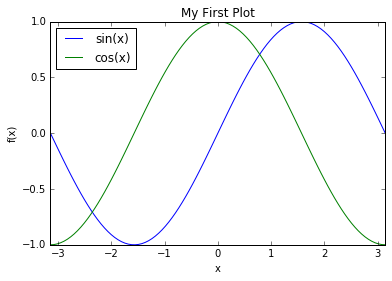

In [9]:
plot(x, f1, label="sin(x)")
plot(x, f2, label="cos(x)")
# ...

xlim((-pi, pi))
#legend?
xlabel('x')
ylabel('f(x)')
title('My First Plot')
legend(loc="upper left")

To conclude this example, using the `figure()` function allows you to create several plots simultaneously,

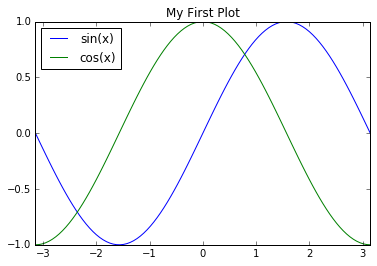

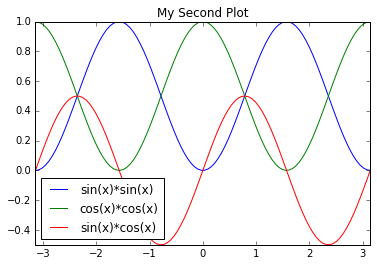

In [10]:
# create a new figure, all following functions affect the new figure
figure()
plot(x, f1, label="sin(x)")
plot(x, f2, label="cos(x)")

xlim((-pi,pi))

title('My First Plot')
legend(loc="upper left")

# create a new figure, all following functions affect the new figure
figure()
plot(x, f1**2, label="sin(x)*sin(x)")
plot(x, f2**2, label="cos(x)*cos(x)")
plot(x, f1*f2, label="sin(x)*cos(x)")

xlim((-pi, pi))
ylim((-0.5, 1.0))

title('My Second Plot')
legend(loc="lower left")


In the previous example we had to import both the `numpy` and `pyplot` modules, for convenience Matplotlib provides the `pylab` module which simultaneously imports them,

In [11]:
from matplotlib.pylab import *

array

<function numpy.core.multiarray.array>

### Different types of plots for 1D functions

Matplotlib provides *many* different types of plots for 1D functions, but we will introduce just a handful of frequently used plots

* `plot(x, y, format, label)` -- plot a 1D function at a set of discrete points.
* `loglog(x, y, format, label)` -- similar to plot, but using logarithmic scales for both axes.
* `semilogx(x, y, format, label)`/`semilogy(x, y, format, label)` -- similar to plot, but using logarithmic scales for one axis.
* `hist(x, bins, range)` - plot a histogram from a set of data.

See Matplotlib's [gallery](http://matplotlib.org/gallery.html) for a relatively comprehensive set of examples with source code!

The previous example provided a quick introduction to `plot()` (and its derivatives), so we only need to understand what the format parameter is and how to use it.

The format string is composed of a color descriptor,

|**character**|**colour**|
|-------------|----------|
|`'b'`        |blue      |
|`'g'`        |green     |
|`'r'`        |red       |
|`'c'`        |cyan      |
|`'m'`        |magenta   |
|`'y'`        |yellow    |
|`'k'`        |black     |
|`'w'`        |white     |

and a line/marker style,

|**character**|**description**    |
|-------------|-------------------|
|`'-'`        |solid line style   |
|`'--'`       |dashed line style  |
|`'-.'`       |dash-dot line style|
|`':'`        |dotted line style  |
|`'.'`        |point marker       |
|`','`        |pixel marker       |
|`'o'`        |circle marker      |

To create a format string simply concatenate the color descriptor and line/marker style together,

|**format string**|**description**                        |
|-----------------|---------------------------------------|
|`'b-'`           |blue, solid line style                 |
|`'k--'`          |black, dashed line style               |
|`'y.'`           |yellow, point marker                   |
|`'r--.'`         |red, dashed line style and point marker|

Depending on the fineness or coarseness of your data you might use markers (coarse), lines (fine) or a combination of the two (intermediate),

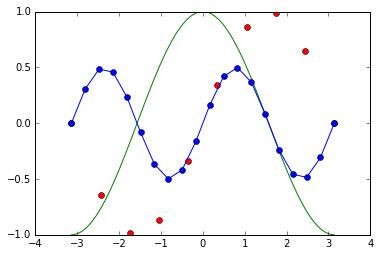

In [12]:
x1 = linspace(-pi, pi, 10)
f1 = sin(x1)

x2 = linspace(-pi, pi, 100)
f2 = cos(x2)

x3 = linspace(-pi, pi, 20)
f3 = sin(x3)*cos(x3)

figure()
plot(x1, f1, "ro", label="sin(x), coarse")
plot(x2, f2, "g-", label="cos(x), fine")
plot(x3, f3, "b-o", label="sin(x)*cos(), intermediate")

Plots on logarithmic scales are useful when there is significant variation in either or both dimensions,

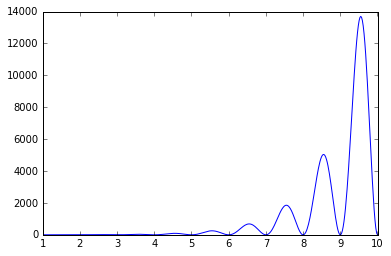

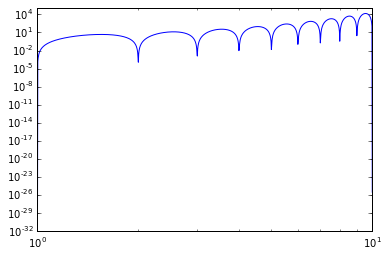

In [13]:
t = logspace(0.0, 1.0,1000)
f = exp(t)*sin(pi*t)**2

figure()
plot(t, f)

figure()
loglog(t, f)


Comparing the two plots, the significance of the logarithmic-scale on the x-axis is minor, but on the y-axis the logarithmic scale  is vital so that the reader observes the short-time oscillations that are not discernable in the linear-scale plot. Using `semilogy()` might be useful so that the time scale is linear (a more familiar scale) and the dependent variable scale is logarithic (a more informative scale),

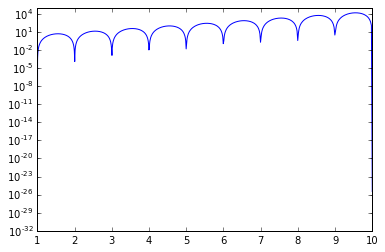

In [14]:
figure()
semilogy(t, f)

Another frequently used 1D plot is a histogram. The `hist()` provides this functionality and a ?perfect? example is to plot a grade distribution,

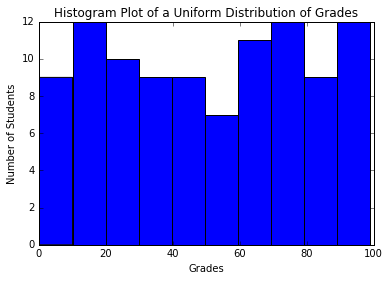

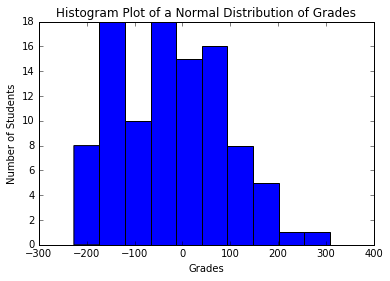

In [15]:
# pylab does not import all sub-modules of numpy!
from numpy import random

# generate two sets of grades sampled from uniform and normal distributions
uniform_grades = 100.*random.uniform(size=(100,))
normal_grades = 100.*random.normal(size=(100,))

figure()
hist(uniform_grades, bins=10)
xlabel("Grades")
ylabel("Number of Students")
title("Histogram Plot of a Uniform Distribution of Grades")

figure()
hist(normal_grades, bins=10)
xlabel("Grades")
ylabel("Number of Students")
title("Histogram Plot of a Normal Distribution of Grades")


### Creating figures with multiple plots -- sub-plots

So far we have learned how to plot multiple data-sets in the same figure and create multiple figures. Frequently we would like to create *multiple plots* in a *single figure*. This can be done in a very simple and intuitive way with Matplotlib using `subplot()`,

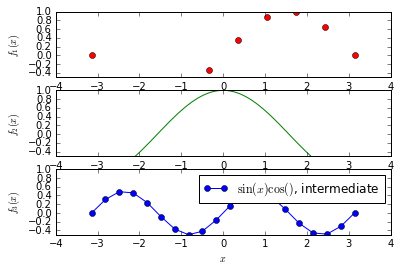

In [16]:
# create a new figure
figure()

# first determine the number of plots N, and how they will be arranged in a grid
# the grid has R rows and C columns

# now call `subplot(R, C, n)` where n is the number of the plot (row-major) that
# you want to create/manipulate
subplot(3, 1, 1)
plot(x1, f1, "ro", label="$\sin(x)$, coarse")
xlabel("$x$")
ylabel("$f_1(x)$")
ylim((-0.5, 1.0))

subplot(3, 1, 2)
plot(x2, f2, "g-", label="$\cos(x)$, fine")
xlabel("$x$")
ylabel("$f_2(x)$")
ylim((-0.5, 1.0))

subplot(3, 1, 3)
plot(x3, f3, "b-o", label="$\sin(x)\cos()$, intermediate")
xlabel("$x$")
ylabel("$f_3(x)$")
ylim((-0.5, 1.0))
legend()


For this example I used Latex for typesetting the labels, a nice feature of Matplotlib that you will hopefully be able to use in the future.

### Plotting 2D functions

Visualizing higher dimensional functions poses significant problems and powerful (and complex) Python libraries exist that are devoted to this (see [Mayavi](http://code.enthought.com/projects/mayavi/)). Matplotlib does provide basic 3D plotting of 2D functions in the `mplot3d` module, but its usage is relatively complex and not as intuitive (or fully featured) as Mayavi.

## Exercises


### Matrix Algebra (using Python and NumPy)

Engineers frequently use matrix algebra to compactly represent and manipulate systems of equations. A simple example of a linear system of equations is a discrete dynamical system, as follows:

$$
\begin{eqnarray}
a_{k+1} =  0.6 a_k + 0.1 d_k + 0.2 s_k\\\
d_{k+1} =  0.1 a_k + 0.7 d_k + 0.1 s_k\\\
s_{k+1} =  0.1 a_k + 0.1 d_k + 0.6 s_k\\\
\end{eqnarray}
$$
where $a_k$, $d_k$, $s_k$ are the number of cars at time $t_k$ at the three locations (airport, downtown, and suburbs) of a car rental agency. This system of linear equations represents the evolution of the number of cars at each location over time. It may be compactly represented in matrix form as follows:
$$
\begin{equation}
\left[
\begin{array}{c}
a_{k+1}\\\
d_{k+1}\\\
s_{k+1}\\\
\end{array}
\right]
=\left[
\begin{array}{c c c}
0.6 & 0.1 & 0.2 \\\
0.1 & 0.7 & 0.1 \\\
0.1 & 0.1 & 0.6 \\\
\end{array}
\right]
\left[
\begin{array}{c}
a_{k}\\\
d_{k}\\\
s_{k}\\\
\end{array}
\right]
\end{equation}
$$

Determine the distribution of cars at $t_{15}$ using Python and NumPy. Start with a distribution of your choice.


### Solving a linear system (using NumPy)

Another application of computer programming, also focusing on linear algebra, involves solving a system of linear equations:
$$
\mathbf{Ax} = \mathbf{b}
$$
which typically represents, approximately, a system we wish to analyze. In this example we will form an interpolant function by "fitting" $n$ observed data points (in time) to a polynomial function of time:
$$
p(t) = \sum_{i=0}^{n-1} a_i t^i
$$
In this example, we measure the altitude of an airplane $f(t)$ at $5$ different points in time:
$$
\begin{align}
f(0) = 10\\\
f(0.5) = 15\\\
f(1.5) = 18\\\
f(2) = 20\\\
f(4) = 21\\\
\end{align}
$$
and wish to fit this to a $4^{th}$ order polynomial. This results in a system of $5$ equations:
$$
\begin{align}
10 &=& (0)^4 a_4  &+& (0)^3 a_3& &+& (0)^2 a_2 &+& (0)^1 a_1 &+& (0)^0 a_0\\\
15 &=& (0.5)^4 a_4 &+& (0.5)^3 a_3& &+& (0.5)^2 a_2 &+& (0.5)^1 a_1 &+& (0.5)^0 a_0\\\
18 &=& (1.5)^4 a_4 &+& (1.5)^3 a_3& &+& (1.5)^2 a_2 &+& (1.5)^1 a_1 &+& (1.5)^0 a_0\\\
20 &=& (2)^4 a_4 &+& (2)^3 a_3& &+& (2)^2 a_2 &+& (2)^1 a_1 &+& (2)^0 a_0\\\
21 &=& (4)^4 a_4 &+& (4)^3 a_3& &+& (4)^2 a_2 &+& (4)^1 a_1 &+& (4)^0 a_0\\\
\end{align}
$$
which is in matrix form:
$$
\begin{equation}
\left[
\begin{array}{c c c c c}
(0)^4 & (0)^3 & (0)^2 & (0)^1 & (0)^0\\\
(0.5)^4 & (0.5)^3 & (0.5)^2 & (0.5)^1 & (0.5)^0\\\
(1.5)^4 & (1.5)^3 & (1.5)^2 & (1.5)^1 & (1.5)^0\\\
(2)^4 & (2)^3 & (2)^2 & (2)^1 & (2)^0\\\
(4)^4 & (4)^3 & (4)^2 & (4)^1 & (4)^0\\\
\end{array}
\right]
\left[
\begin{array}{c}
a_4\\\
a_3\\\
a_2\\\
a_1\\\
a_0\\\
\end{array}
\right]
=\left[
\begin{array}{c}
10\\\
15\\\
18\\\
20\\\
21\\\
\end{array}
\right]
\end{equation}
$$

Solve using Python and NumPy.


### Defining and Plotting a Function (using NumPy and PyLab)

Visualizing data is a key, but often neglected, task where computer programming is useful. In the previous example we solved for an interpolating function $p(t)$ which approximates another function $f(t)$ of which we have only a few data points.

Now we will definite a function and plot that function in order to interpret our fit; we are particularly interested in the altitude that the airplane approaches after a "long" time.

```
def fi(x):
    return(polyval(p,x))
```

where `p` is the array of polynomial coefficients from the previous example.

